In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt 
from pyquil.api import WavefunctionSimulator
from grove.pyqaoa.maxcut_qaoa import maxcut_qaoa
from pyquil.api import get_qc

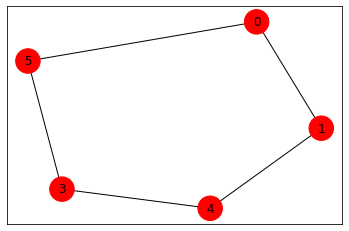

In [2]:
# Generating a graph using NetworkX
E = [(0,1,0.7),(0,5,0.3),(1,4,0.9),(4,3,1.1), (3,5,0.5)] 
weighted_graph = nx.Graph()
weighted_graph.add_weighted_edges_from(E)

# Generate plot of the Graph
colors       = ['r' for node in weighted_graph.nodes()]
default_axes = plt.axes(frameon=True)
pos          = nx.spring_layout(weighted_graph)

nx.draw_networkx(weighted_graph, node_color=colors, node_size=600, alpha=1, ax=default_axes, pos=pos)

In [41]:
#Defining a function that utilizes grove's maxcut QAOA for our graph above
#with the provided number of steps and noise conditions. Returns the list of probabilities.
def maxcut_instance(steps, noisy=True):
    print("noisy value is: ", noisy)
    probs = []
    inst = maxcut_qaoa(weighted_graph, steps=steps, connection=get_qc(f"{len(weighted_graph.nodes)}q-qvm", noisy=noisy))
    opt_betas, opt_gammas = inst.get_angles()
    t = np.hstack((opt_betas, opt_gammas))
    param_prog = inst.get_parameterized_program()
    prog = param_prog(t)
    wf = WavefunctionSimulator().wavefunction(prog)
    wf = wf.amplitudes
    for state_index in range(inst.nstates):
    #print(inst.states[state_index], np.conj(wf[state_index]) * wf[state_index])
        probs.append(np.conj(wf[state_index]) * wf[state_index])
    return probs

In [47]:
#Simulate maxcut to our graph for Steps = 1 and Steps = 4 in a noisy condition.
angles_for_step1 = maxcut_instance(1, True)
angles_for_step4 = maxcut_instance(4, True)

noisy value is:  True
                     models will be ineffective
	Parameters: [3.26919026 1.99491315] 
	E => 5.911753316198778
	Parameters: [3.42486599 1.89516749] 
	E => 5.685119117629842
	Parameters: [3.50270385 2.04478598] 
	E => 5.31758423231286
	Parameters: [3.50270385 2.04478598] 
	E => 5.551328092609361
	Parameters: [3.50270385 2.04478598] 
	E => 5.423514076578368
	Parameters: [3.50270385 2.14453164] 
	E => 5.38619224264384
	Parameters: [3.50270385 2.14453164] 
	E => 5.30406691149684
	Parameters: [3.50270385 2.14453164] 
	E => 5.274290773296989
	Parameters: [3.50270385 2.14453164] 
	E => 5.26851772399977
	Parameters: [3.54648765 2.17102658] 
	E => 5.258816962366409
	Parameters: [3.54648765 2.17102658] 
	E => 5.262469900983248
	Parameters: [3.51973088 2.14375237] 
	E => 5.257693615601382
	Parameters: [3.53006873 2.13615456] 
	E => 5.256965159252301
	Parameters: [3.53569373 2.15549002] 
	E => 5.255853813170679
	Parameters: [3.53569373 2.15549002] 
	E => 5.256893411559141
	Par

In [48]:
# Function to plot the subplots for both steps = 1 and steps = 4
def plot_subplots(probs_subplot1, probs_subplot2):
    xticks = range(32)
    labels = [r'$\left|{0:05b}\right>$'.format(i) for i in range(32)]
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title("Step=1")
    plt.xlabel("bitstrings")
    plt.ylabel("freq.")
    plt.xticks(xticks, labels, rotation="vertical")
    plt.bar(range(32),probs_subplot1, color="green")
    plt.subplot(1, 2, 2)
    plt.title("Step=4")
    plt.xlabel("bitstrings")
    plt.ylabel("freq.")
    plt.xticks(xticks, labels, rotation="vertical")
    plt.bar(range(32),probs_subplot2, color="green")
    plt.tight_layout()
    plt.show()

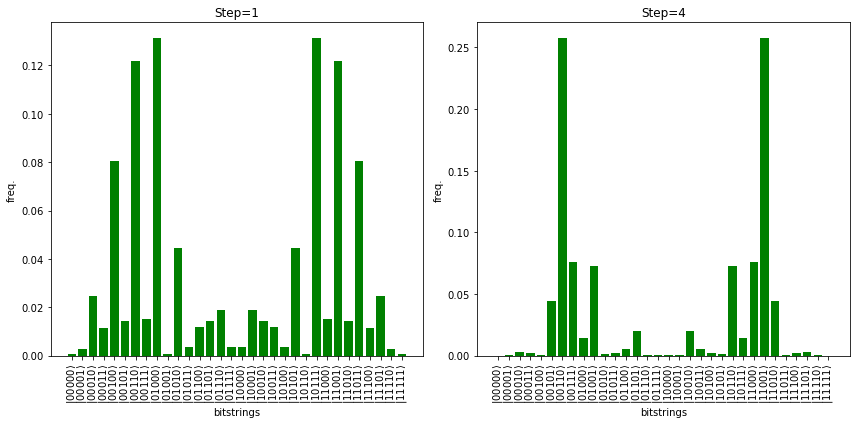

In [49]:
# Plot the subplots for Step = 1 and Steps = 4 in the noisy case.
plot_subplots(angles_for_step1, angles_for_step4)

## Observations for Noisy Case

In our first circuit, which is a noisy case, we can cearly see that the two graphs have a huge difference for Steps = 1 and Steps = 4. Where in the graph for Steps = 4 we can clearly see the two peaks, from which we can imply that if we increase the number of steps/circuit depth further than we can see much clearer results. The final **estimation values- E** of **Step = 1 is 5.25578066347581** and for **Step = 4 is 4.107782750718572**

# Noiseless case

In [50]:
#Simulate maxcut to our graph for Steps = 1 and Steps = 4 in a noiseless condition.
noiseless_angles_for_step1 = maxcut_instance(1, False)
noiseless_angles_for_step4 = maxcut_instance(4, False)

noisy value is:  False
                     models will be ineffective
	Parameters: [3.14127839 5.92527774] 
	E => 6.273286523298306
	Parameters: [3.18054437 6.0363767 ] 
	E => 6.243119683084414
	Parameters: [3.15109489 6.10118443] 
	E => 6.239925979034786
	Parameters: [3.2149021  6.35578621] 
	E => 5.943471410811807
	Parameters: [3.2149021  6.35578621] 
	E => 6.042384753728286
	Parameters: [3.24925984 6.67519571] 
	E => 6.078629711966551
	Parameters: [3.32533767 6.70528501] 
	E => 5.490319069216119
	Parameters: [3.32533767 6.70528501] 
	E => 5.701662371643445
	Parameters: [3.36613748 6.49205602] 
	E => 5.252205674847033
	Parameters: [3.44037472 6.67432775] 
	E => 5.221242934787331
	Parameters: [3.48117453 6.46109876] 
	E => 5.234881671950493
	Parameters: [3.55541177 6.64337049] 
	E => 5.262824228797571
	Parameters: [3.55725237 6.49118806] 
	E => 4.980399411485877
	Parameters: [3.5187533  6.51418902] 
	E => 4.96331334261883
	Parameters: [3.5467073  6.57302951] 
	E => 4.958259807189954


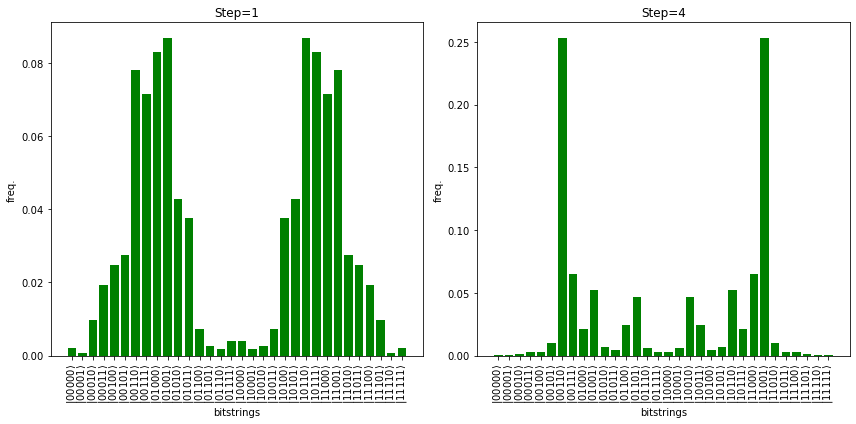

In [51]:
#Plot the subplots for Steps = 1 and Steps = 4 in a noiseless condition.
plot_subplots(noiseless_angles_for_step1, noiseless_angles_for_step4)

## Observations

In this case of noiseless circuit we can see that for Steps = 1 our **final estimation value = E** converges to **4.952989396266446** and for **Steps = 4** the final estimation value converges to **4.3585629690458685**

Finally, from comparing the graphs for both noisy and noiseless circuits at each step we can imply that the QAOA/VQE algorithm is somewhat insensitive to noise. 